## Data stations ordered

### Purpose & Motivation

The purpose of this notebook is to create station specific wavelet files and freeway specific heatmap files for the Wiggle Visualization. The approach is based upon wavelets_exploration_on_wiggles.ipynb

### Direction from Advisor

N/A

### Tasks/Questions to Answer
#### Questions to Answer

N/A

#### Tasks

Create files that is consumed by the wiggle visualization.

### Results

See below

### Conclusions

N/A

### Imports and data prep

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.fftpack
import pandas as pd
import numpy as np
from scipy import signal
import time
import datetime as dt
import matplotlib
# import matplotlib.dates as mdates
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
import wavelet_lib as wl

In [2]:
!ls ../data/weekday_stats_2008_2015_d11.csv

../data/weekday_stats_2008_2015_d11.csv


In [3]:
# df = pd.read_csv('../data/2015_station_days_with_meta.csv', usecols=range(1,20))
# df = df.ix[df['Partition'] == 'Weekdays']
# flow_df = df.pivot(index='Station', columns='Time', values='Flow')
# flow_df.head()

In [4]:
df_new = pd.read_csv('../data/weekday_stats_2008_2015_d11.csv', usecols=range(1,5))
df_new.head()

,station,hour,minute,flow_mean
0,1100745,0,0,7.512630
1,1108341,0,0,51.487548
2,1118333,0,0,33.414307
3,1118663,0,0,57.559220
4,1119756,0,0,37.619578


In [5]:
df_new['Time'] = pd.to_datetime(df_new['hour'].astype('str') + ':' + df_new['minute'].astype('str'),
                                format='%H:%M').dt.time
df_new.head()

,station,hour,minute,flow_mean,Time
0,1100745,0,0,7.512630,00:00:00
1,1108341,0,0,51.487548,00:00:00
2,1118333,0,0,33.414307,00:00:00
3,1118663,0,0,57.559220,00:00:00
4,1119756,0,0,37.619578,00:00:00


In [6]:
flow_df = df_new.pivot(index='station', columns='Time', values='flow_mean')
flow_df.head()

Time,00:00:00,00:05:00,00:10:00,00:15:00,00:20:00,00:25:00,00:30:00,00:35:00,00:40:00,00:45:00,...,23:10:00,23:15:00,23:20:00,23:25:00,23:30:00,23:35:00,23:40:00,23:45:00,23:50:00,23:55:00
station,,,,,,,,,,,,,,,,,,,,,
1100270,6.009901,5.852941,5.543689,5.320388,4.584158,4.890000,4.808081,4.131313,4.070707,3.890000,...,9.561224,8.857143,8.424242,7.940594,7.861386,8.050505,6.969072,7.520833,7.183673,7.112245
1100310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1100313,8.481554,8.195385,8.176240,7.812285,7.913920,6.808239,6.503445,6.121063,5.731923,5.477362,...,16.253314,15.288377,14.346569,13.239216,12.760667,12.334806,12.161433,12.151277,11.530452,10.615422
1100323,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1100326,8.474893,7.870469,7.486141,7.034133,6.613782,6.311502,5.929412,5.611230,5.332977,4.971138,...,14.632675,14.567467,13.394989,13.073028,12.507733,11.843033,11.280683,10.827900,10.229044,10.088675


In [7]:
# a = flow_df[flow_df.index==1108148]
# a = np.array(a.transpose())
# a = np.concatenate(a)
# widths = np.arange(1, 100, 1)
# cwtmatr = signal.cwt(a, signal.morlet, widths)
# plt.imshow(cwtmatr, extent=[-1, 1, min(widths), max(widths)], cmap='PRGn', aspect='auto',
#            vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
# plt.show()

Continuous wavelet transform shows magnitude of transform with denser colors.  Green is positive, purple is negative.  

### A Short Wavelet Scale

In [8]:
import time
import wavelet_lib as wl
reload(wl)

<module 'wavelet_lib' from 'wavelet_lib.pyc'>

In [9]:
x_axis_data = []
for hour in range(0, 24):
    if hour < 10:
        hour_text = "0%s" % hour
    else:
        hour_text = hour
    for minute in range(0, 60):
        if minute < 10:
            minute_text = "0%s" % minute
        else:
            minute_text = minute
        x_axis_data.append("%s:%s" % (hour_text, minute_text))
        
print len(x_axis_data)
x_axis = pd.DataFrame(x_axis_data)
x_axis.columns = ['x']
x_axis.to_csv('../vis/WiggleVis/data/heatmaps/x_axis.csv', index=False)

1440


In [10]:
length = 5*288
width = 5
my_s = 5
my_wave = signal.morlet(length,w=width,s=my_s)

In [10]:
start_time = time.time()

wavelet_result = {}
total = len(flow_df.index)
print total
counter = 0
for station in flow_df.index:
    counter += 1
    if counter % 10 == 0:
        print counter
    a = flow_df[flow_df.index == station]
    a = np.array(a.transpose())
    a = np.concatenate(a)
    a = np.repeat(a, 5)

    wt = wl.my_wavelet_transform(a, my_wave)
    smooth = wl.smooth_amplitude(wt)*100
#     original = a
#     result = pd.DataFrame({'wt': wt, 'smooth': smooth, 'original': a})
#     result = pd.DataFrame({'wt': wt, 'wt_real': np.real(wt), 'original': a})
#     result = pd.DataFrame({'x': x_axis_data, 'wt': np.real(wt), 'original': a})
    result = pd.DataFrame({'wt': np.real(wt), 'original': a})
#     print result.head()
#     print station
#     result = result.set_index('x')
#     print result.head()
    result.to_csv('../vis/WiggleVis/data/stations/%s.csv' % station, index=False)
#     print station
    break

print station
print "total_time: %s" % str(time.time() - start_time)

1783
1100270
total_time: 0.968514919281


(288, 1)
(288,)
(1440,)
134


//anaconda/lib/python2.7/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


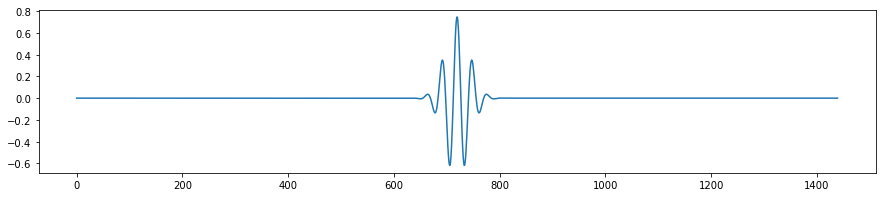

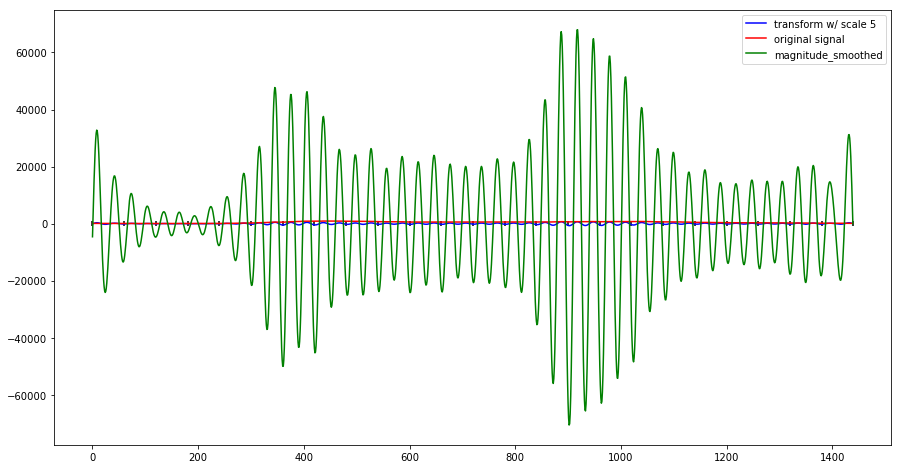

In [11]:
width = 5
my_s = 5
a = flow_df[flow_df.index==1108148]
a = np.array(a.transpose())
print a.shape
a = np.concatenate(a)
print a.shape
a = np.repeat(a, 5)
print a.shape

plt.figure(figsize=(15,3))
my_wave = signal.morlet(len(a),w=width,s=my_s)
print len([i for i in my_wave if abs(i)>.01])

plt.plot(my_wave)
plt.show()

plt.figure(figsize=(15,8))
wt = wl.my_wavelet_transform(a,my_wave)
plt.plot(wt, color='b', label = 'transform w/ scale {}'.format(str(width)))
plt.plot(a, color='r', label = 'original signal')
# plt.plot(wl.smooth_amplitude(wt)*100,color='g', label = 'magnitude_smoothed')
plt.plot(np.real(wt)*100,color='g', label = 'magnitude_smoothed')
plt.vlines([(len(a)/24)*j for j in range(25)],-1000,1000)

plt.legend()
plt.show()

### Apply to a bunch

In [12]:
meta_df = pd.read_csv('../data/meta_2008_2015.csv')

In [13]:
meta_df.Dir.unique()

array(['W', 'E', 'S', 'N'], dtype=object)

In [14]:
meta_df.Fwy.unique()

array([ 94,  78,   5, 805,   8, 163,  15,  52, 125, 905,  56,  54,  67])

In [33]:
import math
for Fwy in meta_df.Fwy.unique():
    for Dir in meta_df.Dir.unique():
        idx1 = meta_df['Fwy'] == Fwy
        idx2 = meta_df['Dir'] == Dir
        idx3 = meta_df['Type'] == 'ML'
        fwy_df = meta_df.ix[idx1&idx2&idx3,:].sort_values('Abs_PM', ascending=True).set_index('ID')
        print fwy_df.index
        if len(fwy_df) > 0:
            print "Fwy: %s Dir: %s" % (Fwy, Dir)
            t1 = time.time()
            my_list = []
            for station in fwy_df.index:
                a = flow_df[flow_df.index==station]
                a = np.array(a.transpose())
                a = np.concatenate(a)
                a = np.repeat(a, 5)
                wt = wl.my_wavelet_transform(a,my_wave)
#                 my_list.append(wl.smooth_amplitude(wt))
                real_data = np.real(wt)
#                 my_list.append(real_data)
                series_data = pd.Series(real_data).apply(
                    lambda x: 0 if x == 0 else -1*math.log(-1*x) if x < 0 else math.log(x))
                my_list.append(np.real(series_data))
            my_array = np.vstack(my_list)
            frame = pd.DataFrame(np.real(my_array))
            frame.index = fwy_df.index
            frame.to_csv('../vis/WiggleVis/data/heatmaps/wiggle_analysis_%s_%s.csv' % (Fwy, Dir))
            t2 = time.time()
            print t2-t1

Int64Index([1113349, 1118989, 1111558, 1108285, 1122956, 1108287, 1108289,
            1108291, 1108293, 1108295, 1108297, 1108302, 1108304, 1108306,
            1108308, 1108311, 1108313, 1108315, 1108317, 1113173, 1113126,
            1114001, 1120121],
           dtype='int64', name=u'ID')
Fwy: 94 Dir: W
18.2098531723
Int64Index([1108380, 1108378, 1122951, 1108376, 1111568, 1111559, 1111567,
            1118648, 1108374, 1108505, 1114441, 1108503, 1113966, 1108501,
            1113181, 1113318],
           dtype='int64', name=u'ID')
Fwy: 94 Dir: E
13.0815649033
Int64Index([], dtype='int64', name=u'ID')
Int64Index([], dtype='int64', name=u'ID')
Int64Index([1112996, 1108619, 1108621, 1108401, 1108760, 1116167, 1108623,
            1115897, 1108625, 1108647, 1118260, 1108627, 1108629, 1108643,
            1108631, 1116433, 1116431, 1108762, 1108599, 1108697, 1108700,
            1115692, 1108704, 1126022, 1126035, 1108708],
           dtype='int64', name=u'ID')
Fwy: 78 Dir: W
21.098703

In [16]:
frame.head()

,0,1,2,3,4,5,6,7,8,9,...,1430,1431,1432,1433,1434,1435,1436,1437,1438,1439
ID,,,,,,,,,,,,,,,,,,,,,
1108689,-24.478465,17.940809,59.175998,97.291360,130.544379,157.478991,176.999819,188.423117,191.501743,186.423322,...,238.544325,248.691471,248.797708,238.506436,217.962818,187.826610,149.255334,103.857621,53.618580,0.801022
1108731,-17.974578,18.079383,52.973487,85.062039,112.872006,135.182102,151.085284,160.030987,161.844916,156.725724,...,211.418913,221.915148,223.378105,215.442112,198.198177,172.206187,138.480052,98.445737,53.873939,6.790922
1108733,-14.818815,13.333770,40.634286,65.796438,87.665066,105.278042,117.915455,125.133230,126.779429,122.992664,...,160.525471,167.329781,167.396725,160.493162,146.721394,126.527399,100.689257,70.285689,36.645989,1.283900


In [17]:
!ls ../vis/WiggleVis/data/heatmaps/

wiggle_analysis_125_N.csv wiggle_analysis_54_W.csv  wiggle_analysis_8_E.csv
wiggle_analysis_125_S.csv wiggle_analysis_56_E.csv  wiggle_analysis_8_W.csv
wiggle_analysis_15_N.csv  wiggle_analysis_56_W.csv  wiggle_analysis_905_E.csv
wiggle_analysis_15_S.csv  wiggle_analysis_5_N.csv   wiggle_analysis_905_W.csv
wiggle_analysis_163_N.csv wiggle_analysis_5_S.csv   wiggle_analysis_94_E.csv
wiggle_analysis_163_S.csv wiggle_analysis_78_E.csv  wiggle_analysis_94_W.csv
wiggle_analysis_52_E.csv  wiggle_analysis_78_W.csv  x_axis.csv
wiggle_analysis_52_W.csv  wiggle_analysis_805_N.csv
wiggle_analysis_54_E.csv  wiggle_analysis_805_S.csv


In [18]:
# idx1 = meta_df['Fwy'] == 15
# idx2 = meta_df['Dir'] == 'S'
# idx3 = meta_df['Type'] == 'ML'
# fwy_df = meta_df.ix[idx1&idx2&idx3,:].sort_values('Abs_PM', ascending=False)
# print len(fwy_df)

84


In [14]:
# t1 = time.time()
# my_list = []
# for station in fwy_df.index:
#     a = flow_df[flow_df.index==station]
#     a = np.array(a.transpose())
#     a = np.concatenate(a)
#     a = np.repeat(a, 5)
#     wt = wl.my_wavelet_transform(a,my_wave)
#     my_list.append(wl.smooth_amplitude(wt))
# my_array = np.vstack(my_list)
# frame = pd.DataFrame(np.real(my_array))
# frame.to_csv('../vis/WiggleVis/data/heatmaps/wiggle_analysis_%s_%s.csv' % (15, 'S'))
# t2 = time.time()
# print t2-t1
# frame.head()


58.3365550041


,0,1,2,3,4,5,6,7,8,9,...,1430,1431,1432,1433,1434,1435,1436,1437,1438,1439
0,0.005035,0.224702,0.432648,0.618864,0.774614,0.892913,0.968886,1.0,0.986145,0.929571,...,0.882036,0.962008,1.000000,0.992918,0.939984,0.842834,0.705475,0.534102,0.336775,0.122994
1,0.003703,0.221707,0.429183,0.615874,0.772675,0.892147,0.968924,1.0,0.984860,0.925465,...,0.826666,0.926872,0.986000,1.000000,0.967179,0.888344,0.766792,0.608160,0.420123,0.211969
2,0.037103,0.254132,0.458895,0.641336,0.792649,0.905766,0.975742,1.0,0.978434,0.913361,...,0.835969,0.932848,0.988902,1.000000,0.964346,0.882641,0.758096,0.596287,0.404874,0.193181
3,0.024773,0.241095,0.445956,0.629364,0.782527,0.898334,0.971736,1.0,0.982815,0.922258,...,0.850761,0.942813,0.993871,1.000000,0.959591,0.873513,0.745120,0.580103,0.386204,0.172799
4,0.054401,0.270319,0.473331,0.653474,0.802057,0.912148,0.978941,1.0,0.975350,0.907425,...,0.848078,0.941024,0.993006,1.000000,0.960324,0.874794,0.746735,0.581829,0.387832,0.174144


In [15]:
frame.shape

(66, 1440)

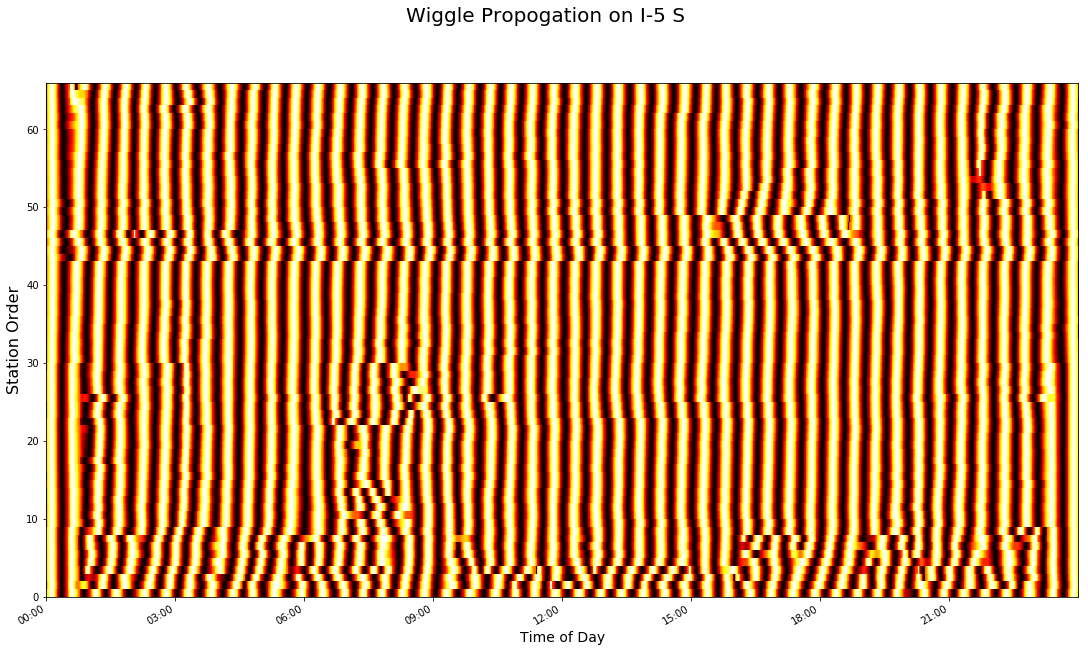

In [12]:
# Generate some random data for imshow
N = 10
# arr = np.random.random((N, N))

# Create your x-limits. Using two of your unix timestamps you first
# create a list of datetime.datetime objects using map.
x_lims = [dt.datetime(2017,1,1,0,0,0),dt.datetime(2017,1,1,23,59,59)]

# You can then convert these datetime.datetime objects to the correct
# format for matplotlib to work with.
x_lims = mdates.date2num(x_lims)

# Set some generic y-limits.
y_lims = [0, len(my_list)]

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
fig.suptitle("Wiggle Propogation on I-5 S", fontsize=20)
plt.xlabel('Time of Day', fontsize=14)
plt.ylabel('Station Order', fontsize=16)
# Using ax.imshow we set two keyword arguments. The first is extent.
# We give extent the values from x_lims and y_lims above.
# We also set the aspect to "auto" which should set the plot up nicely.
ax.imshow(np.real(my_array), cmap='hot', extent = [x_lims[0], x_lims[1],  y_lims[0], y_lims[1]], 
          aspect='auto')

# We tell Matplotlib that the x-axis is filled with datetime data, 
# this converts it from a float (which is the output of date2num) 
# into a nice datetime string.
ax.xaxis_date()

# We can use a DateFormatter to choose how this datetime string will look.
# I have chosen HH:MM:SS though you could add DD/MM/YY if you had data
# over different days.
date_format = mdates.DateFormatter('%H:%M')

ax.xaxis.set_major_formatter(date_format)

# This simply sets the x-axis data to diagonal so it fits better.
fig.autofmt_xdate()

plt.show()

In [ ]:
# Generate some random data for imshow
N = 10
# arr = np.random.random((N, N))

# Create your x-limits. Using two of your unix timestamps you first
# create a list of datetime.datetime objects using map.
x_lims = [dt.datetime(2017,1,1,0,0,0),dt.datetime(2017,1,1,23,59,59)]

# You can then convert these datetime.datetime objects to the correct
# format for matplotlib to work with.
x_lims = mdates.date2num(x_lims)

# Set some generic y-limits.
y_lims = [0, len(my_list)]

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
fig.suptitle("Wiggle Propogation on I-5 S", fontsize=20)
plt.xlabel('Time of Day', fontsize=14)
plt.ylabel('Station Order', fontsize=16)
# Using ax.imshow we set two keyword arguments. The first is extent.
# We give extent the values from x_lims and y_lims above.
# We also set the aspect to "auto" which should set the plot up nicely.
ax.imshow(np.real(my_array), cmap='hot', extent = [x_lims[0], x_lims[1],  y_lims[0], y_lims[1]], 
          aspect='auto')

# We tell Matplotlib that the x-axis is filled with datetime data, 
# this converts it from a float (which is the output of date2num) 
# into a nice datetime string.
ax.xaxis_date()

# We can use a DateFormatter to choose how this datetime string will look.
# I have chosen HH:MM:SS though you could add DD/MM/YY if you had data
# over different days.
date_format = mdates.DateFormatter('%H:%M')

ax.xaxis.set_major_formatter(date_format)

# This simply sets the x-axis data to diagonal so it fits better.
fig.autofmt_xdate()

plt.show()

In [13]:
fwy_df.to_csv('station_order.csv')

In [14]:
pd.DataFrame(np.real(my_array)).to_csv('wiggle_analysis.csv')

In [15]:
start_time = 9
end_time = 10
small = np.real(my_array)[:,int(60*start_time):int(60*end_time)]

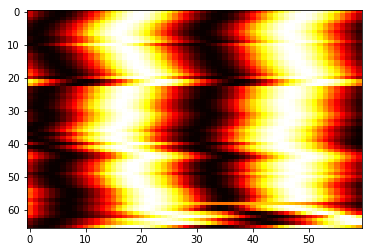

In [16]:
# plt.imshow(small, cmap='hot',aspect='auto')